## Batch processing analysis of spatial location from neural activity

Created by @mcolomer and @cmitelut

Flavio Donato's lab

6 Sep 2022

### Library import

First, we import the relevant libraries as well as the utils.py and the projection_decoder.py scripts which contain the custom-made functions for the analysis

In [1]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# Computing
import numpy as np
from scipy import io
from scipy import stats
import sys

# Files
import pandas as pd
import os
import glob
import pickle
import h5py
import seaborn as sns
from utils_nathalie import *

# Saving settings
%autosave 180
%load_ext autoreload
%autoreload 2

Autosaving every 180 seconds


In [2]:
# SETTING AND FORMAT OF PLOTS
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

font = {'family' : 'normal',
        'weight' : 'normal'}

#plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

### Paths to the input and output directories

Here we select the paths to the input and output directories

In [90]:
# Select the directory with the input data
main_dir = "/media/cat/4TB/donato/nathalie"
animal_id = "DON-007417"

#
root_dir = os.path.join(main_dir, animal_id)

# Select the sessions you want to analyse
session_numbers = np.arange(1,13)
#session_numbers = [9]
sessions = []
for i in session_numbers:
    sessions.append('FS'+str(i))
print(sessions)


out_dir = os.path.join(main_dir, animal_id, "PLOTS")

try:
    os.mkdir(out_dir)
except:
    pass

['FS1', 'FS2', 'FS3', 'FS4', 'FS5', 'FS6', 'FS7', 'FS8', 'FS9', 'FS10', 'FS11', 'FS12']


### Get the location data

In [91]:

#
for i in trange(len(sessions)):

    fname_csv = glob.glob(os.path.join(root_dir,
                             sessions[i],
                             "*0.csv"))[0]
    # 
    locs = load_csv(fname_csv)
    body_feature_idx = 5*3+1
    #print ("Body feature index", np.arange(body_feature_idx,body_feature_idx+2,1))
    neck = np.float32(locs[3:,body_feature_idx:body_feature_idx+2])
    #print (neck.shape)

    np.save(fname_csv[:-4]+'_locs.npy', neck)


100%|██████████| 12/12 [00:07<00:00,  1.69it/s]


## Get the input data for the decoders

In [92]:
# Create new lists where data will be stored
f_sessions = []
locs_partitioned_sessions = []
partition_times_sessions = []
locs_cm_sessions = []
# Iterate through all the sessions
for i in range(len(sessions)):
    # Open the files with the data
    fname_csv = glob.glob(os.path.join(root_dir,
                             sessions[i],
                             "*0.csv"))[0]
    fname_locs = fname_csv[:-4]+'_locs.npy'
    fname_bin = glob.glob(os.path.join(root_dir,
                             sessions[i],
                             '*.npz'))[0]
    fname_start = os.path.join(root_dir,
                               sessions[i],
                               'start.txt')
    #Get the data in bins
    (f_binned,
     locs_partitioned,
     partition_times,
     partition,
     box_width,
     box_length,
     locs_cm,
     partition_size,
     ) = get_data_decoders_2D(fname_locs,
                         fname_bin, partition_size=10)
    if f_binned.shape[0] < locs_partitioned.shape[0]:
        locs_partitioned = locs_partitioned[locs_partitioned.shape[0]-f_binned.shape[0]:]
        locs_cm = locs_cm[locs_cm.shape[0]-f_binned.shape[0]:,:]
    f_filtered = f_binned
    if False:
        f_filtered = np.take(f_binned, filtered_cells[i], 1)
    f_sessions.append(f_filtered)
    locs_partitioned_sessions.append(locs_partitioned)
    partition_times_sessions.append(partition_times)
    locs_cm_sessions.append(locs_cm)

bin upphase:  (463, 36024)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (463, 36024)
(36000, 463)
1424.064 1261.9912
DONE
bin upphase:  (460, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (460, 36025)
(36000, 460)
1258.2644 1257.4475
DONE
bin upphase:  (421, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (421, 36025)
(36000, 421)
1252.6418 1257.5457
DONE
bin upphase:  (401, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (401, 36025)
(36000, 401)
1253.1852 1254.8301
DONE
bin upphase:  (356, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (356, 36025)
(36000, 356)
1257.3066 1249.9628
DONE
bin upphase:  (395, 36025)
All DLC locations:  (36000, 2)
Final locations shape:  (36000, 2)
bin upphase:  (395, 36025)
(36000, 395)
1261.4756 1257.0004
DONE
bin upphase:  (373, 36024)
All DLC locations:  (36000

## Analysis of each session

### Boxplot to study the accuracy for every sessions

## Analysis only moving periods


## Visualisation of the states using dimensionality reduction techniques

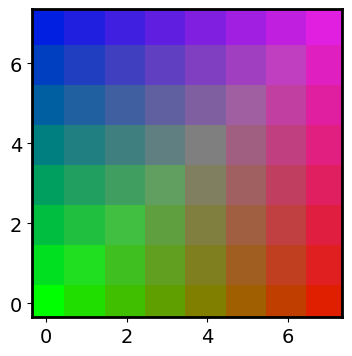

In [93]:

def get_cmap_2d():
    xlist = []
    ylist = []
    colorlist = []

    for i in range(0, 8):
        for j in range(0, 8):
            xlist.append(i)
            ylist.append(j)
            if i > j:
                colorlist.append(((float(32*i/255), float((255-32*i)/255), float(32*j/255))))
            else:
                colorlist.append(((float(32*i/255), float((255-32*j)/255), float(32*j/255))))

    fig = plt.figure(figsize=(4,4))
    plt.scatter(xlist, ylist, c=colorlist, edgecolor='none',s=1000, marker='s')
    plt.show()

    cmap = plt.get_cmap('autumn_r')
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', colorlist[0:], cmap.N)

    
    return cmap

cmap = get_cmap_2d()

## All periods

# of place cells:  (157,)


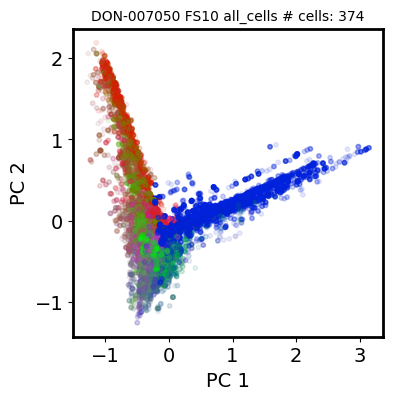

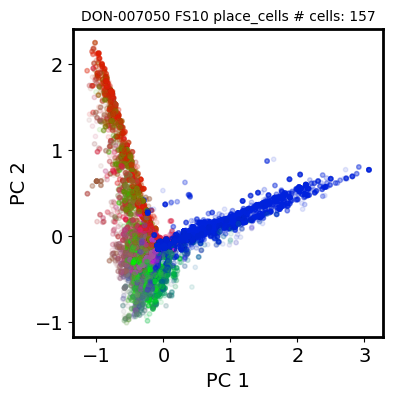

In [69]:
def get_place_cell_ids(fname_in):
    
    d = np.load(fname_in, allow_pickle=True)
    
    cell_ids = []
    for k in range(len(d)):
        cell_ids.append(d[k]['cell_id'])

    return np.int32(cell_ids)

# Iterate through all the sessions
#for i in range(len(sessions)):
flags = ['all_cells','place_cells']
for flag in flags:
    for i in [9]:

        # setup
        #if os.path.exists(fname_out):
        #    continue

        #
        fname_out1 = os.path.join(out_dir,'PCA_3D_'+sessions[i]+'_'+flag+'.png')
        fname_out2 = os.path.join(out_dir,'PCA_3D_'+sessions[i]+'_'+flag+'3d.png')

        
        # load neural data
        neural_data = f_sessions[i]
        locs_partitioned = locs_partitioned_sessions[i]
        locs_cm = locs_cm_sessions[i]

        # optional: use only good cells
        if flag=='place_cells':
            fname_in = os.path.join(root_dir,"FS"+str(i+1),'place_cells.npy')
            place_cell_ids = get_place_cell_ids(fname_in)
            neural_data = neural_data[:,place_cell_ids]    
            print ("# of place cells: ", place_cell_ids.shape)
            

        # load decoder
        prodecoder = ProjectionDecoder()
        ave = prodecoder.fit(neural_data, locs_partitioned, 50)
        y_pred_PCA = prodecoder.predict(neural_data)
        X_train_pca = prodecoder.transform_pca(neural_data)
        
        #
        fig = plt.figure(figsize=(4,4))
        plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = locs_partitioned, cmap = cmap, alpha=0.1,s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.title(animal_id + " " + sessions[i]+" "+flag+" # cells: "+str(neural_data.shape[1]), fontsize=10)
        
        
        fig.savefig(fname_out1, dpi=600, bbox_inches='tight')

        #plt.close()
    

## Moving periods

# of place cells:  (142,)


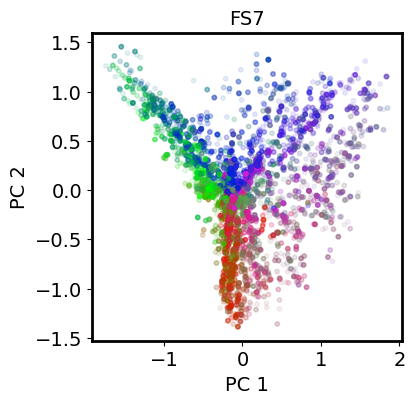

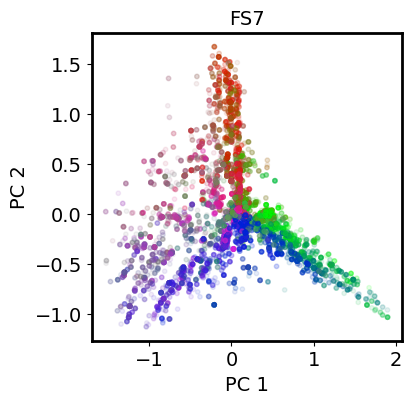

In [70]:
# Iterate through all the sessions
#for i in range(len(sessions)):
flags = ['all_cells','place_cells']
for flag in flags:
    for i in [6]:

         #

        #
        neural_data = f_sessions[i]
        locs_partitioned = locs_partitioned_sessions[i]
        locs_cm = locs_cm_sessions[i]


        # COMPUTE THE SPEED
        speed_threshold = 4.0 #Set a threshold for the speed
        speed = compute_speed(locs_cm, smooth=True, frames_smooth=20)
        mobile, idx_mob, idx_imm = is_mobile(speed, threshold=speed_threshold)

        # optional: use only good cells
        if flag=='place_cells':
            fname_in = os.path.join(root_dir,"FS"+str(i+1),'place_cells.npy')
            place_cell_ids = get_place_cell_ids(fname_in)
            neural_data = neural_data[:,place_cell_ids]    
            print ("# of place cells: ", place_cell_ids.shape)

        #
        prodecoder = ProjectionDecoder()
        ave = prodecoder.fit(neural_data[idx_mob],locs_partitioned[idx_mob], 50)
        y_pred_PCA = prodecoder.predict(neural_data[idx_mob])
        X_train_pca = prodecoder.transform_pca(neural_data[idx_mob])

        #
        fname_out = os.path.join(out_dir,'PCA_3D_moving_'+sessions[i]+" "+flag+'.png')

        #
        fig = plt.figure(figsize=(4,4))
        plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = locs_partitioned[idx_mob], cmap = cmap, alpha=0.1,s=10)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.title(sessions[i])
        fig.savefig(fname_out, dpi=600, bbox_inches='tight')


    

In [97]:
# Create new lists where data will be stored
y_pred_PCA_sessions = []
y_pred_PCA_cm_sessions = []
y_pred_bayesian_sessions = []
distances_sessions = []
distances_sessions_bayes = []

# Iterate through all the sessions
#for i in trange(len(sessions)):
for i in [0,1,2]:
    neural_data = f_sessions[i]
    locs_partitioned = locs_partitioned_sessions[i]
    locs_cm = locs_cm_sessions[i]
    print(neural_data.shape)
    print(locs_partitioned.shape)
    print(locs_cm.shape)
    # COMPUTE THE SPEED
    speed_threshold = 2 #Set a threshold for the speed
    speed = compute_speed(locs_cm, smooth=True, frames_smooth=20)
    mobile, idx_mob, idx_imm = is_mobile(speed, threshold=speed_threshold)


    # Plot speed as a function of time
    if False:
        time = np.arange(0,len(speed))/(20*60)
        plt.figure(figsize=(20,4))
        plt.plot(time, speed)
        plt.xlabel('Time (min)')
        plt.ylabel('Speed (cm/s)')
        plt.xlim(0,max(time))
        plt.ylim(0,30)
        plt.axhline(speed_threshold, label= 'speed_threshold')
    
    # optional: use only good cells
    flag='all_cells'
    if flag=='place_cells':
        fname_in = os.path.join(root_dir,"FS"+str(i+1),'place_cells.npy')
        place_cell_ids = get_place_cell_ids(fname_in)
        neural_data = neural_data[:,place_cell_ids]    
        #print ("# of place cells: ", place_cell_ids.shape, " size of neural data: ", neural_data[idx_mob].shape)

            
    # Apply the projection decoder
    if False:
        prodecoder = ProjectionDecoder()
        n_dimensions = 50

        #
        ave = prodecoder.fit(neural_data[idx_mob[0:5000]],locs_partitioned[idx_mob[0:5000]], n_dimensions)
        y_pred_PCA = prodecoder.predict(neural_data)
        X_train_pca = prodecoder.transform_pca(neural_data)
        y_pred_PCA_cm = neural_loc_to_y(y_pred_PCA, box_width, partition_size)

        # Get the distance between the predicted value and the true value
        distances = get_distance(locs_cm,y_pred_PCA_cm)
    
    # Bayesian decoder
    x_mob = neural_data[idx_mob[0:5000]]
    y_mob = locs_cm[idx_mob[0:5000]]
    X, y = preprocess_bayesian(x_mob, y_mob)
    X, X_train, y_train, neural_data = split_data(X,y, neural_data)
    model_nb=NaiveBayesRegression(res=10)
    model_nb.fit(X_train,y_train)
    y_bayes =model_nb.predict(neural_data,y)
    
    # Get the distance between the predicted value and the true value
    distances_bayes = get_distance(locs_cm,y_bayes)    
    
    # Plot histogram of distances between the decoded location and the true location
    if False:
        fig = plt.figure(figsize=(2,2))
        plt.hist(distances, bins=10, alpha=0.5)
        plt.xlabel('Distance error (cm)')
        plt.ylabel('Frequency')
        plt.title(sessions[i])
        fig.savefig(os.path.join(out_dir,'Histogram_distances_'+sessions[i]+'.png'), dpi=600, bbox_inches='tight')


        # Plot the plot relating speed with the distance between the decoded and true location
        fig = plt.figure(figsize=(4,4))
        plt.xlabel('Speed (cm/s)')
        plt.ylabel('Distance error (cm)')
        plt.scatter(speed[idx_mob], distances[idx_mob], s=10, alpha=0.01)
        plt.scatter(speed[idx_imm], distances[idx_imm], s=10, alpha=0.01)
        plt.scatter(-10,-10, s=10, alpha=1, c='blue', label='Moving period')
        plt.scatter(-10,-10, s=10, alpha=1, c='orange', label='Stationary period')
        plt.legend()
        plt.xlim(-2,50)
        plt.ylim(0,100)
        plt.title(sessions[i])
        fig.savefig(os.path.join(out_dir,'Speed_vs_distances_'+sessions[i]+'.png'), dpi=600, bbox_inches='tight')

    #
    y_pred_PCA_sessions.append(y_pred_PCA)
    y_pred_PCA_cm_sessions.append(y_pred_PCA_cm)
    distances_sessions.append(distances)
    distances_sessions_bayes.append(distances_bayes)
    y_pred_bayesian_sessions.append(y_bayes)

(36000, 463)
(36000,)
(36000, 2)
(5000, 463)
(4992, 2)
(4992, 463)


100%|██████████| 36000/36000 [00:36<00:00, 978.70it/s] 


(36000, 460)
(36000,)
(36000, 2)
(5000, 460)
(4989, 2)
(4989, 460)


100%|██████████| 36000/36000 [00:33<00:00, 1074.43it/s]


(36000, 421)
(36000,)
(36000, 2)
(5000, 421)
(4976, 2)
(4976, 421)


100%|██████████| 36000/36000 [00:31<00:00, 1161.26it/s]


Text(0.5, 0, 'Session')

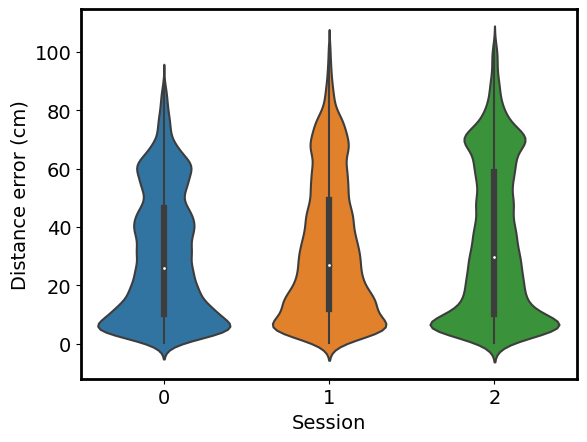

In [98]:
fig = plt.figure()
ax = sns.violinplot(data = distances_sessions_bayes, showfliers=False)
plt.ylabel("Distance error (cm)")
plt.xlabel("Session")

In [99]:
dists1 = distances_sessions_bayes
print (dists1)

#dists_place_cells = distances_sessions_bayes


[array([30.69969925, 28.27810391, 26.13606952, ...,  1.59158147,
        3.39495195,  8.29636562]), array([35.21004555, 33.09371052, 31.15672389, ..., 46.50318394,
       44.36912257, 53.42015933]), array([31.60026356, 29.06426763, 26.72677326, ..., 24.50652992,
       24.72562321, 32.78570548])]


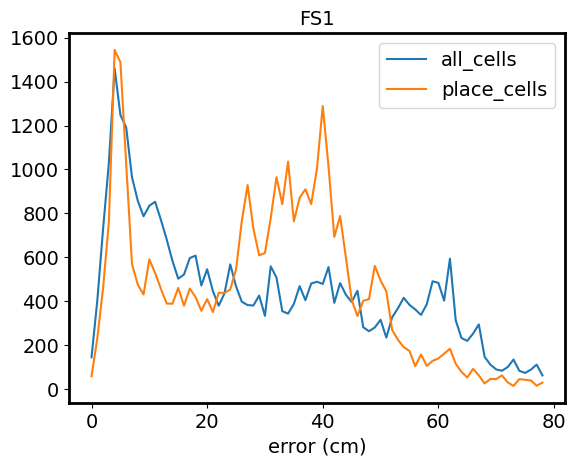

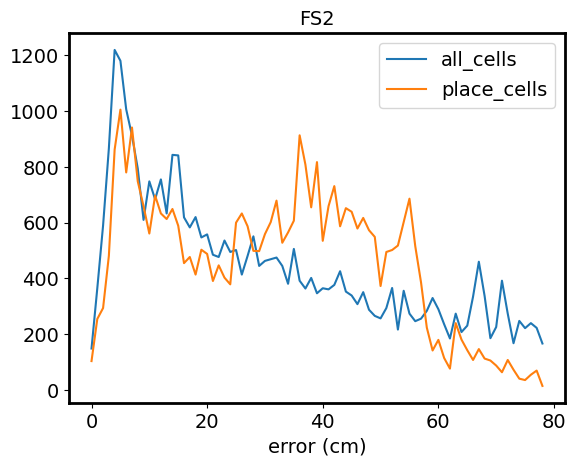

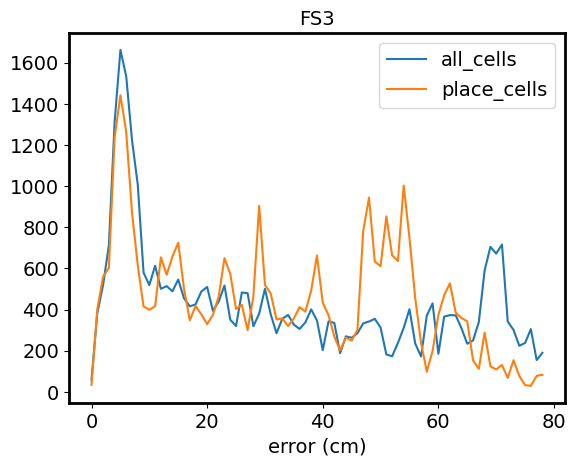

In [100]:
labels = [
'all_cells',
    'place_cells'
    
]

for p in range(3):

    plt.figure()
    plt.title("FS"+str(p+1))
    #
    y1 = np.histogram(dists1[p],bins=np.arange(0,80,1))
    plt.plot(y1[1][:-1], y1[0],label='all_cells')

    #
    y1 = np.histogram(dists_place_cells[p],bins=np.arange(0,80,1))
    plt.plot(y1[1][:-1], y1[0], label='place_cells')
    plt.legend()

    plt.xlabel("error (cm)")
    
    plt.show()
    